
Date and kTotalRewards:
               date  kTotalRewards
2024-05-24 12:00:00            NaN
2024-05-24 18:00:00            NaN
2024-05-25 00:00:00            NaN
2024-05-25 06:00:00            NaN
2024-05-25 12:00:00            NaN
2024-05-25 18:00:00            NaN
2024-05-26 00:00:00            NaN
2024-05-26 06:00:00            NaN
2024-05-26 12:00:00            NaN
2024-05-26 18:00:00            NaN
2024-05-27 00:00:00            NaN
2024-05-27 06:00:00            NaN
2024-05-27 12:00:00            NaN
2024-05-27 18:00:00            NaN
2024-05-28 00:00:00            NaN
2024-05-28 06:00:00            NaN
2024-05-28 12:00:00            NaN
2024-05-28 18:00:00            NaN
2024-05-29 00:00:00            NaN
2024-05-29 06:00:00            NaN
2024-05-29 12:00:00            NaN
2024-05-29 18:00:00            NaN
2024-05-30 00:00:00            NaN
2024-05-30 06:00:00            NaN
2024-05-30 12:00:00            NaN
2024-05-30 18:00:00            NaN
2024-05-31 00:00:00           

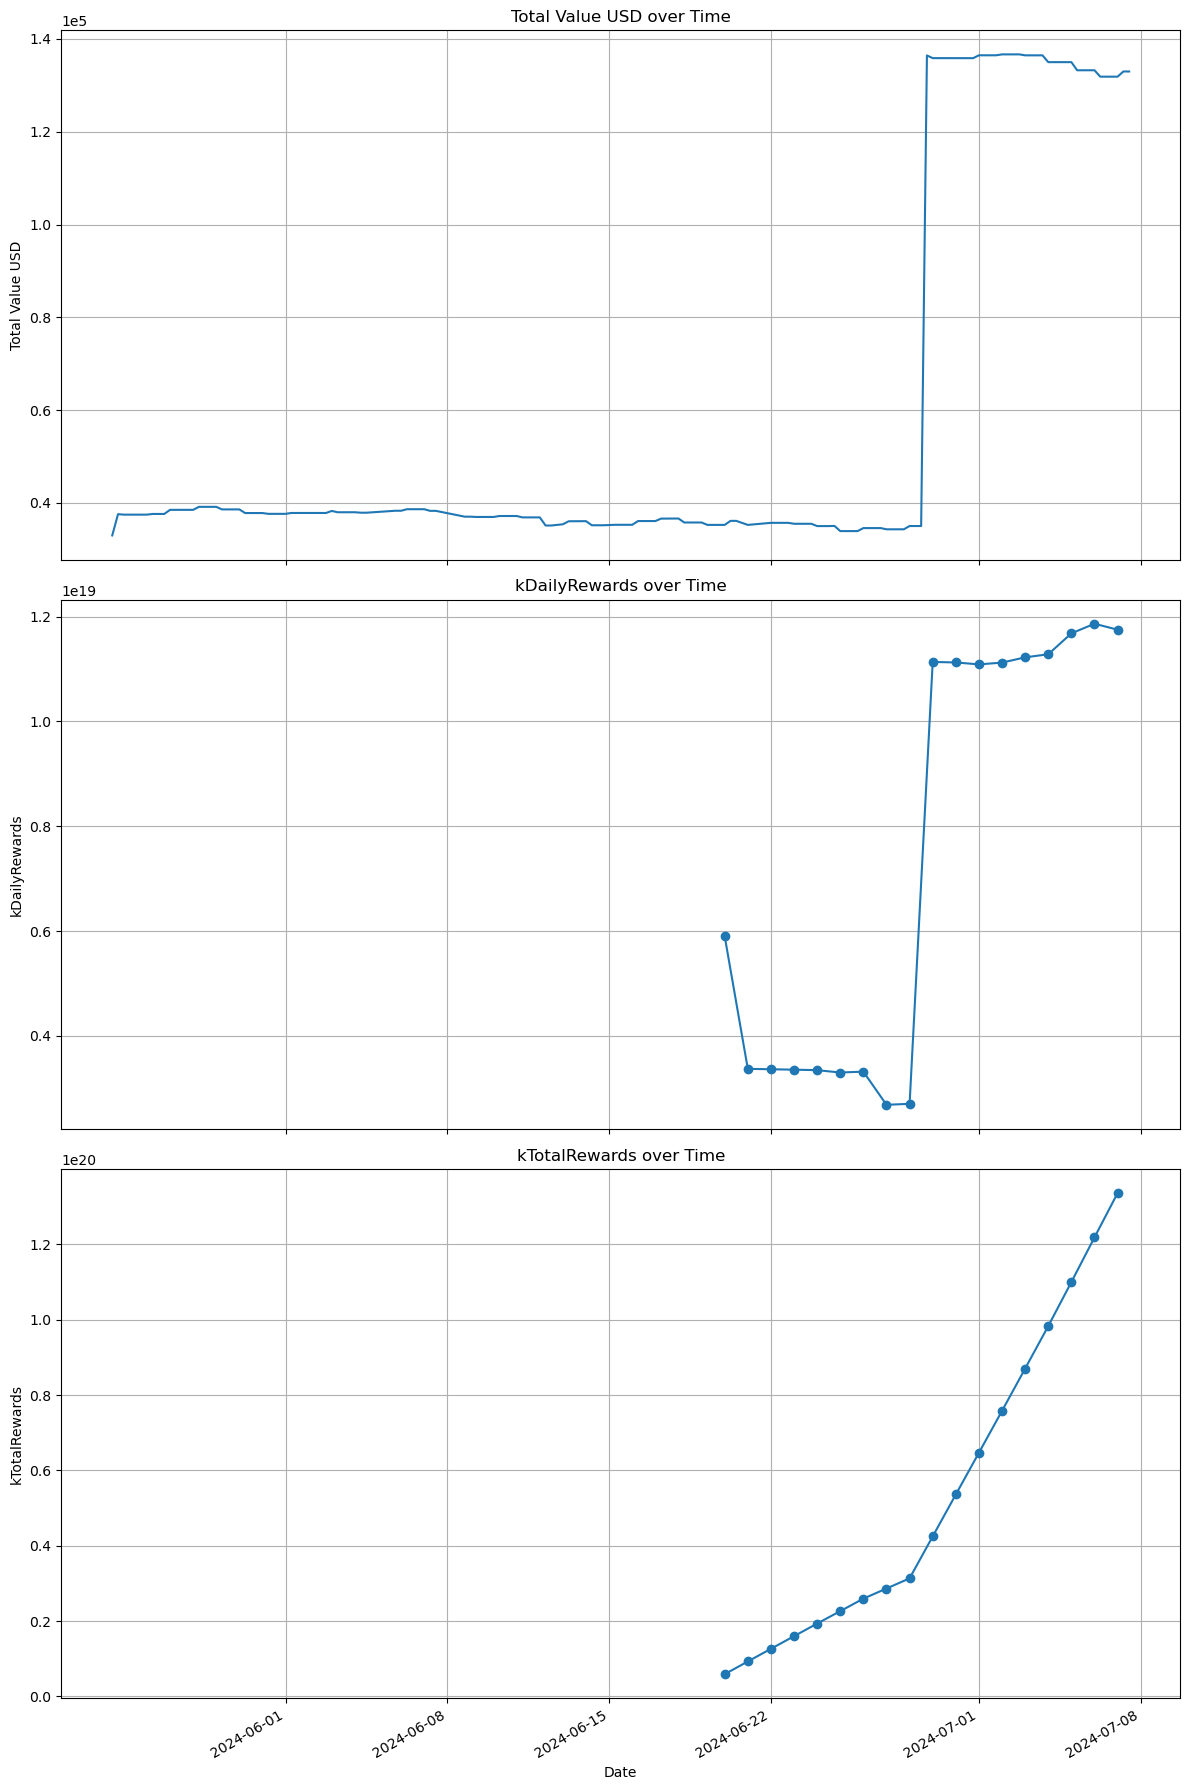

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data
with open('./data/wallet.json', 'r') as file:
    json_data = json.load(file)

# Extract the data array
data = json_data['data']

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Unix timestamp to datetime
df['date'] = pd.to_datetime(df['date'], unit='s')

# Sort by date
df = df.sort_values('date')

# Convert null values to NaN for easier handling
df = df.replace({None: np.nan})

# Print date and totalValueUSD side by side
print("\nDate and kTotalRewards:")
print(df[['date', 'kTotalRewards']].to_string(index=False))

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot totalValueUSD
ax1.plot(df['date'], df['totalValueUSD'])
ax1.set_title('Total Value USD over Time')
ax1.set_ylabel('Total Value USD')
ax1.grid(True)

# Plot kDailyRewards
mask_daily = df['kDailyRewards'].notna()
ax2.plot(df.loc[mask_daily, 'date'], df.loc[mask_daily, 'kDailyRewards'], '-o')
ax2.set_title('kDailyRewards over Time')
ax2.set_ylabel('kDailyRewards')
ax2.grid(True)

# Plot kTotalRewards
mask_total = df['kTotalRewards'].notna()
ax3.plot(df.loc[mask_total, 'date'], df.loc[mask_total, 'kTotalRewards'], '-o')
ax3.set_title('kTotalRewards over Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('kTotalRewards')
ax3.grid(True)

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a scientific notation for y-axis
for ax in [ax1, ax2, ax3]:
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('multi_plot_visualization_non_zero.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'multi_plot_visualization_non_zero.png'")

# Display the plot
plt.show()